


Objective: To develop a restaurant recommendation system that suggests top 5 restaurants based on user preferences and significant features

Data Source: UCI Machine Learning Repository

Data Description: There are 9 reports provided for this project. Of these 9 reports, 5 reports contain restaurant data, 4 reports contain user data and 1 report contains the rating data.

Approach:

**1) Exploratory data analysis: **
Here I am computing descriptive statistics of each report and started identifying features are target variable

**2) Data cleaning: **
a) NaN Handling: The are many columns with missing values or '?'. I am replacing some of the missing features by average of the column or median. For categorical values, I am making few assumptions. For example, if parking column says '?' I am assuming it as 'No Parking' as more than 80% of all the parking column values are 'No Parking'.
b) Univariate Analysis: Here I am plotting histograms to look for outliers and unusual spikes in the variance

**3) Data Integration: **
a) Here I am merging all 5 reports containing restaurant data into one dataframe, 4 reports containing customer data into one dataframe.
b) Many features have values split into multiple rows. For example, the restaurant hours data has hours listed for each day into multiple rows. For these kind of scenarios, I am creating functions to collate all the related data for a given restaurant into 1 or 2 rows
 

**4) Data reduction: **
a) For this project, restaurant rating is most important variable. If the restaurants do not have rating data, I am not considering those restaurants. 
b) Some user features like height, weight, color are irrelevant to our analysis So I am performing data reduction to reduce these data points.

**5) Data Transformation: **
a) One-hot encoding: Restaurant cuisine values are categorical. So I am performing one-hot encoding to convert them to numbers
b) Aggregation: I am performing row-wise summations for features that are more useful when they are aggregated.
c) I am normailizing the data to address any issue of model being highly sensitive to scaling

**5) Feature Engineering and Selection: **
a) Coorelation Matrix: As there are high number of features(60+), we are plotting correlation matrix to identify features that correlate with the rating variable
b) Scatter Matrix: I am plotting scatter matrix to find hidden patterns
c) ANOVA: I would like to find the significant features based on the ANOVA generated

**6) Model: **
As the data is labeled data, we are using a supervised learning model. As the target variable is continous wer are using regressors

Linear Regression: I would like to do Linear Regression as a benchmark and quickly calculate coefficients and understand significance.
K-Nearest Neighbors: I would like to use kNN regressor as this is high dimensional data with many features

**7) Model Evaluation: **
I will evaluate the model by calculating accuracy scores of the predicted variable.

**Step 1: Exploratory data analysis Begins!**

In [1]:
import pandas as pd
import numpy as np

res_payment = pd.read_csv('chefmozaccepts.csv')
res_cuisine = pd.read_csv('chefmozcuisine.csv')
res_hours = pd.read_csv('chefmozhours4.csv')
res_parking = pd.read_csv('chefmozparking.csv')
res_geo = pd.read_csv('geoplaces2.csv')
user_cuisine = pd.read_csv('usercuisine.csv')
user_payment = pd.read_csv('userpayment.csv')
user_profile = pd.read_csv('userprofile.csv')
final_rating = pd.read_csv('rating_final.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 7: invalid continuation byte

In [2]:
print(res_payment.head(3))
print("Total number of rows in res_payment: {}.".format(res_payment.shape[0]))
print("Number of unique restaurants in res_payment: {}.".format(res_payment['placeID'].nunique()))
print('\n')
print(res_cuisine.head(3))
print("Total number of rows in res_payment: {}.".format(res_cuisine.shape[0]))
print("Number of unique restaurants in res_payment: {}.".format(res_cuisine['placeID'].nunique()))
print('\n')
print(res_hours.head(3))
print("Total number of rows in res_payment: {}.".format(res_hours.shape[0]))
print("Number of unique restaurants in res_payment: {}.".format(res_hours['placeID'].nunique()))
print('\n')
print(res_parking.head(3))
print("Total number of rows in res_payment: {}.".format(res_parking.shape[0]))
print("Number of unique restaurants in res_payment: {}.".format(res_parking['placeID'].nunique()))
print('\n')
print(res_geo.head(3))
print("Total number of rows in res_payment: {}.".format(res_geo.shape[0]))
print("Number of unique restaurants in res_payment: {}.".format(res_geo['placeID'].nunique()))

   placeID             Rpayment
0   135110                 cash
1   135110                 VISA
2   135110  MasterCard-Eurocard
Total number of rows in res_payment: 1314.
Number of unique restaurants in res_payment: 615.


   placeID        Rcuisine
0   135110         Spanish
1   135109         Italian
2   135107  Latin_American
Total number of rows in res_payment: 916.
Number of unique restaurants in res_payment: 769.


   placeID         hours                  days
0   135111  00:00-23:30;  Mon;Tue;Wed;Thu;Fri;
1   135111  00:00-23:30;                  Sat;
2   135111  00:00-23:30;                  Sun;
Total number of rows in res_payment: 2339.
Number of unique restaurants in res_payment: 694.


   placeID parking_lot
0   135111      public
1   135110        none
2   135109        none
Total number of rows in res_payment: 702.
Number of unique restaurants in res_payment: 675.


   placeID   latitude   longitude  \
0   134999  18.915421  -99.184871   
1   132825  22.147392 -100.98309

We can see from the above data that each of the dataframe contains multiple rows for a given place id. So we are creating a function that merges multiple row values into single value for a given place id.

In [3]:
def create_resdictdf(res_df):
    merge_column = res_df.columns[1]
    placeID_list = res_df['placeID'].unique()
    res_col_dict = {}
    for placeID in placeID_list:
        res_col_list = res_df[merge_column][res_df['placeID']==placeID].tolist()
        res_col_dict[placeID] = res_col_list

    res_dictdf = pd.DataFrame(columns= res_df.columns)
    for key in res_col_dict:
        res_dictdf = res_dictdf.append({'placeID':key, merge_column: res_col_dict[key]}, ignore_index = True)
    
    res_dictdf['placeID'] = res_dictdf['placeID'].astype('int64')
    return ''

In [4]:
res_payment1 = create_resdictdf(res_payment)
print(res_payment1.head(3))
res_parking1 = create_resdictdf(res_parking)
print(res_parking1.head(3))

   placeID                                           Rpayment
0   135110  [cash, VISA, MasterCard-Eurocard, American_Exp...
1   135109                                             [cash]
2   135107  [cash, VISA, MasterCard-Eurocard, American_Exp...
   placeID parking_lot
0   135111    [public]
1   135110      [none]
2   135109      [none]


In [5]:
# Doing it similarly for hours data. The hours data differs to that of parking or cuisine or payment.
# So we are writing a new function here.
res_hours['days_hours'] = '[' + res_hours['days'] + ']:[' + res_hours['hours'] + ']'
placeID_list = res_hours['placeID'].unique()
res_hours_dict = {}
for placeID in placeID_list:
    res_hours_list = res_hours['days_hours'][res_hours['placeID']==placeID].tolist()
    res_hours_dict[placeID] = res_hours_list
    
res_hours1 = pd.DataFrame(columns= ['placeID', 'days_hours'])
for key in res_hours_dict:
    res_hours1 = res_hours1.append({'placeID':key, 'days_hours': res_hours_dict[key]}, ignore_index = True)

res_hours1['placeID'] = res_hours1['placeID'].astype('int64') 
print(res_hours1.head(3))

   placeID                                         days_hours
0   135111  [[Mon;Tue;Wed;Thu;Fri;]:[00:00-23:30;], [Sat;]...
1   135110  [[Mon;Tue;Wed;Thu;Fri;]:[08:00-19:00;], [Sat;]...
2   135109  [[Mon;Tue;Wed;Thu;Fri;]:[08:00-21:00;], [Sat;]...


Now we have merged all the rows for each restaurant data file for a given placeID.

When we combine all the 5 data files we can calculate the total number of restuarants.


In [6]:
total_no_restuarants = res_payment['placeID']
total_no_restuarants = total_no_restuarants.append([res_cuisine['placeID'],
                                                    res_hours['placeID'],
                                                    res_parking['placeID'], 
                                                    res_geo['placeID']])
total_no_restuarants = total_no_restuarants.drop_duplicates()
print("Total number of restaurants {}.".format(len(total_no_restuarants)))

Total number of restaurants 938.


Merging all restaurant data into one dataframe

In [7]:
res_total = pd.DataFrame(total_no_restuarants)
print(res_total.head())

    placeID
0    135110
5    135109
6    135107
11   135106
14   135105


In [8]:
res_total = res_total.reset_index(drop=True)
res_total.head()

,placeID
0,135110
1,135109
2,135107
3,135106
4,135105


In [9]:
res_cuisine_dummy = pd.get_dummies(res_cuisine,columns=['Rcuisine'])
res_cuisine_dummy = res_cuisine_dummy.groupby('placeID',as_index=False).sum()
res_cuisine_dummy.head()

,placeID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,...,Rcuisine_Soup,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Thai,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,132001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,132002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,132004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,132005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
res_total = pd.merge(left= res_total, right= res_payment1, how='left',  on='placeID')
res_total = pd.merge(left= res_total, right= res_cuisine_dummy, how='left', on='placeID')
res_total = pd.merge(left= res_total, right= res_hours1, how='left', on='placeID')
res_total = pd.merge(left= res_total, right= res_parking1, how='left', on='placeID')
res_total = pd.merge(left= res_total, right= res_geo, how='left', on='placeID')
res_total.head()

,placeID,Rpayment,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,135110,"[cash, VISA, MasterCard-Eurocard, American_Exp...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,135109,[cash],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Wine-Beer,not permitted,informal,no_accessibility,medium,?,quiet,f,closed,Internet
2,135107,"[cash, VISA, MasterCard-Eurocard, American_Exp...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135106,"[cash, VISA, MasterCard-Eurocard]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
4,135105,[cash],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(res_total.shape)

(938, 83)


So now, res_total is the final dataframe containing restaurant level data.

On the other hand, we have users data in 3 reports

In [12]:
def create_userdictdf(user_df):
    merge_column = user_df.columns[1]
    userID_list = user_df['userID'].unique()
    user_col_dict = {}
    for userID in userID_list:
        user_col_list = user_df[merge_column][user_df['userID']==userID].tolist()
        user_col_dict[userID] = user_col_list

    user_dictdf = pd.DataFrame(columns= user_df.columns)
    for key in user_col_dict:
        user_dictdf = user_dictdf.append({'userID':key, merge_column: user_col_dict[key]}, ignore_index = True)
    
    return user_dictdf

In [13]:
user_cuisine1 = create_userdictdf(user_cuisine)
user_payment1 = create_userdictdf(user_payment)
user_cuisine1.head()

,userID,Rcuisine
0,U1001,[American]
1,U1002,[Mexican]
2,U1003,[Mexican]
3,U1004,"[Bakery, Breakfast-Brunch, Japanese, Contempor..."
4,U1005,[American]


In [14]:
user_payment1.head()

,userID,Upayment
0,U1001,[cash]
1,U1002,[cash]
2,U1003,[cash]
3,U1004,"[cash, bank_debit_cards]"
4,U1005,[cash]


In [15]:
total_no_users = user_cuisine1['userID']
total_no_users = total_no_users.append([user_payment1['userID'],
                                                    user_profile['userID']])
total_no_users = total_no_users.drop_duplicates()
print("Total number of users {}.".format(len(total_no_users)))

Total number of users 138.


In [16]:
user_total = pd.DataFrame(total_no_users)
print(user_total.head())

  userID
0  U1001
1  U1002
2  U1003
3  U1004
4  U1005


In [17]:
user_total = user_total.reset_index(drop=True)
user_total.head()

,userID
0,U1001
1,U1002
2,U1003
3,U1004
4,U1005


In [18]:
user_total = pd.merge(left= user_total, right= user_profile, how='left', on='userID')
user_total = pd.merge(left= user_total, right= user_cuisine1, how='left', on='userID')
user_total = pd.merge(left= user_total, right= user_payment1, how='left', on='userID')

user_total.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,...,interest,personality,religion,activity,color,weight,budget,height,Rcuisine,Upayment
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,...,variety,thrifty-protector,none,student,black,69,medium,1.77,[American],[cash]
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,...,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,[Mexican],[cash]
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,...,none,hard-worker,Catholic,student,blue,60,low,1.69,[Mexican],[cash]
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,...,variety,hard-worker,none,professional,green,44,medium,1.53,"[Bakery, Breakfast-Brunch, Japanese, Contempor...","[cash, bank_debit_cards]"
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,...,none,thrifty-protector,Catholic,student,black,65,medium,1.69,[American],[cash]


In [19]:
user_total.shape

(138, 21)

In [142]:
user_total.isnull().sum()

userID              0
latitude            0
longitude           0
smoker              0
drink_level         0
dress_preference    0
ambience            0
transport           0
marital_status      0
hijos               0
birth_year          0
interest            0
personality         0
religion            0
activity            0
color               0
weight              0
budget              0
height              0
Rcuisine            0
Upayment            5
dtype: int64

In [143]:
user_total = user_total.fillna(0)
user_total.isnull().sum()

userID              0
latitude            0
longitude           0
smoker              0
drink_level         0
dress_preference    0
ambience            0
transport           0
marital_status      0
hijos               0
birth_year          0
interest            0
personality         0
religion            0
activity            0
color               0
weight              0
budget              0
height              0
Rcuisine            0
Upayment            0
dtype: int64

So now, user_total is the final dataframe containing all user level data.

Overall we have integrated data from 9 reports to 3 dataframes - res_total, user_total, final_rating

**Data Integration** is completed

Now we would like to perform **data reduction** by aiming to reduce the rows and features.

The final rating data contains the actual restaurants containing ratings. So we would like to focus only on these restaurants.



In [20]:
print(res_total.shape)
print(final_rating.shape)
final_rating_placeID_list = final_rating['placeID'].unique()
res_total = res_total[res_total['placeID'].isin(final_rating_placeID_list)]
print(res_total.shape)

(938, 83)
(1161, 5)
(130, 83)


In [21]:
res_total = res_total.reset_index(drop=True)
res_total.head()

,placeID,Rpayment,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,135109,[cash],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Wine-Beer,not permitted,informal,no_accessibility,medium,?,quiet,f,closed,Internet
1,135106,"[cash, VISA, MasterCard-Eurocard]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
2,135104,"[cash, VISA, MasterCard-Eurocard]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Full_Bar,not permitted,informal,completely,medium,?,familiar,t,closed,variety
3,135088,[cash],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No_Alcohol_Served,not permitted,informal,no_accessibility,low,www.cenidet.edu.mx,quiet,f,closed,none
4,135086,"[cash, VISA, MasterCard-Eurocard]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,t,closed,none


Given that user data does not contain any information regarding hours, the_geom_meter, we would like to drop these features from restaurant data. 

In [22]:
print(res_total.shape)
res_total = res_total.drop(columns=['days_hours','the_geom_meter','country', 'name', 'address', 'city', 'state','zip', 'fax'])
print(res_total.shape)

(130, 83)
(130, 74)


In [23]:
res_total.to_csv('res_total5.csv')

In [24]:
user_total.to_csv('user_total5.csv')

**Data Transformation:**
For our analysis, we would need the data to be numeric.
So here we are exploring data and make assumptions to map the data to numerical values.

We will start with parking data by performing frequency distribution to explore the parking options

In [25]:
res_parking['parking_lot'].value_counts()

none                 348
yes                  174
public               102
street                32
fee                   22
valet parking         21
validated parking      3
Name: parking_lot, dtype: int64

The parking data is not explained in the dataset. It is self-explanatory to some level. But for many restaurants, there are more than one parking option available. So we would like to make some assumptions here. Parking is one of the important features for a given restaurant, so if the restaurant has no parking then we will give a value of 0. If there is a fee, we will give a value of 1 and if it is 'yes' or 'public' we will give a value 2.

In [26]:
res_total['parking_lot'] = res_total['parking_lot'].apply(lambda x:x[0])

In [27]:
res_total['parking_lot'] = res_total.parking_lot.map({'fee':1, 'none':0, 'public':1, 'yes':2,
                                        'street':1, 'valet parking':2, 'validated parking':1})

In [28]:
res_total['alcohol'] = res_total['alcohol'].map(lambda x: 0 if x == 'No_Alcohol_Served' else 1)
res_total['smoking_area'] = res_total['smoking_area'].map(lambda x: 0 if (x == 'none') | (x == 'not permitted') else 1)
res_total['other_services'] = res_total['other_services'].map(lambda x: 0 if x == 'none'  else 1)
res_total['price'] = res_total['price'].map({'low': 1, 'medium': 2, 'high': 3})

In [29]:
res_total['dress_code'] = res_total['dress_code'].map({'informal':0, 'casual':0, 'formal': 1})
res_total['accessibility'] = res_total['accessibility'].map({'no_accessibility':0, 'partially':1, 'completely': 2})
res_total['Rambience'] = res_total['Rambience'].map({'familiar':0, 'quiet': 1})
res_total['area'] = res_total['area'].map({'open':0, 'closed':1})

In [30]:
res_total.head()

,placeID,Rpayment,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,135109,[cash],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,2,?,1,f,1,1
1,135106,"[cash, VISA, MasterCard-Eurocard]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,1,2,?,0,f,0,0
2,135104,"[cash, VISA, MasterCard-Eurocard]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,2,2,?,0,t,1,1
3,135088,[cash],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,www.cenidet.edu.mx,1,f,1,0
4,135086,"[cash, VISA, MasterCard-Eurocard]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,2,?,0,t,1,0


In [33]:
res_payment['Rpayment'].value_counts()

cash                   500
MasterCard-Eurocard    194
VISA                   172
American_Express       153
bank_debit_cards       130
Visa                    83
Diners_Club             42
Discover                11
checks                  10
Carte_Blanche            7
gift_certificates        7
Japan_Credit_Bureau      5
Name: Rpayment, dtype: int64

In [34]:
user_payment['Upayment'].value_counts()

cash                   131
bank_debit_cards        22
VISA                    17
MasterCard-Eurocard      4
American_Express         3
Name: Upayment, dtype: int64

Given that the dataset origin is from Mexico, based on my general knowledge, I assume people in Mexico would like to perform transactions in cash. So if the restaurant accepts cash, we would like give it a higher value of 2. If it does not accept cash, we would like to give it a value of 1

In [35]:
res_total['Rpayment'] = res_total['Rpayment'].apply(lambda x:x[0] if type(x)==list else x)
res_total['Rpayment'] = res_total['Rpayment'] .map({'cash':2, 'VISA':1})
res_total['Rpayment'] = res_total['Rpayment'].fillna(0)
res_total['Rpayment'] = res_total['Rpayment'].astype('int64')

In [36]:
res_total['franchise'] = res_total['franchise'].map({'f':1, 't':0})

In [37]:
res_total['url'] = res_total['url'].replace('?',0)
res_total['url'] = res_total['url'].replace('no',0)
res_total['url'] = res_total['url'].apply(lambda x:1 if x!=0 else x)

In [38]:
res_total_bkup = res_total.copy()

In [39]:
res_total.head()

,placeID,Rpayment,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,135109,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,2,0,1,1,1,1
1,135106,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,1,2,0,0,1,0,0
2,135104,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,2,2,0,0,0,1,1
3,135088,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,1,1,1,0
4,135086,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,2,0,0,0,1,0


In [48]:
print(res_total.isnull().sum())

placeID                           0
Rpayment                          0
Rcuisine_Afghan                  35
Rcuisine_African                 35
Rcuisine_American                35
Rcuisine_Armenian                35
Rcuisine_Asian                   35
Rcuisine_Bagels                  35
Rcuisine_Bakery                  35
Rcuisine_Bar                     35
Rcuisine_Bar_Pub_Brewery         35
Rcuisine_Barbecue                35
Rcuisine_Brazilian               35
Rcuisine_Breakfast-Brunch        35
Rcuisine_Burgers                 35
Rcuisine_Cafe-Coffee_Shop        35
Rcuisine_Cafeteria               35
Rcuisine_California              35
Rcuisine_Caribbean               35
Rcuisine_Chinese                 35
Rcuisine_Contemporary            35
Rcuisine_Continental-European    35
Rcuisine_Deli-Sandwiches         35
Rcuisine_Dessert-Ice_Cream       35
Rcuisine_Diner                   35
Rcuisine_Dutch-Belgian           35
Rcuisine_Eastern_European        35
Rcuisine_Ethiopian          

In [49]:
res_total = res_total.fillna(0)

In [50]:
cuisines_to_drop = res_total.columns.values[np.sum(res_total,axis=0) == 0] 
res_total = res_total.drop(cuisines_to_drop, axis=1)

In [51]:
res_total.head()

,placeID,Rpayment,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,Rcuisine_Breakfast-Brunch,Rcuisine_Burgers,Rcuisine_Cafe-Coffee_Shop,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,135109,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,2,0,1,1,1,1
1,135106,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,1,2,0,0,1,0,0
2,135104,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,2,2,0,0,0,1,1
3,135088,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,1,1,1,0
4,135086,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,2,0,0,0,1,0


In [ ]:
res_total_bkup = pd.merge(left= res_total_bkup, right= final_rating, how='left', on='placeID')

In [58]:
overall_rating = pd.DataFrame( np.zeros((len(res_total),len(total_no_users)))-1.0, 
                              columns=total_no_users, index=res_total['placeID'] )
food_rating = overall_rating.copy()
service_rating = overall_rating.copy()

In [57]:
overall_rating.shape

(130, 138)

In [70]:
for r, u, o, f, s in zip(final_rating.placeID, final_rating.userID, final_rating.rating, final_rating.food_rating, 
                         final_rating.service_rating):
    overall_rating.loc[r,u] = o
    food_rating.loc[r,u] = f
    service_rating.loc[r,u] = s

In [72]:
# This tells us whether a restaurant-user pair has a rating. 0 means No and 1 means Yes.
review = pd.DataFrame( np.zeros(overall_rating.shape), columns=total_no_users, index=res_total['placeID'])
review[overall_rating >= 0] = 1

In [73]:
review.head()

userID,U1001,U1002,U1003,U1004,U1005,U1006,U1007,U1008,U1009,U1010,...,U1129,U1130,U1131,U1132,U1133,U1134,U1135,U1136,U1137,U1138
placeID,,,,,,,,,,,,,,,,,,,,,
135109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135106,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
135104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135086,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
# Calculate the mean rating for each restaurant
def GetMean(Y,R,column_name):

    Y = Y*R    
    Y[column_name] =  (np.sum(Y, axis=1)/np.sum((R == 1.0), axis=1))
    mean_df = pd.DataFrame(Y[column_name])
    return mean_df

Y_overall_mean = GetMean(overall_rating,review, 'overall_rating')
Y_food_mean = GetMean(food_rating,review, 'food_rating')
Y_service_mean = GetMean(service_rating,review, 'service_rating')

In [159]:
# For feature engineering, create a dataframe that analyse restaurant features with ratings
res_total_feature_analyse = res_total.copy()
res_total_feature_analyse = pd.merge(left=res_total_feature_analyse, right=Y_overall_mean, how='left', on='placeID')
res_total_feature_analyse = pd.merge(left=res_total_feature_analyse, right=Y_food_mean, how='left', on='placeID')
res_total_feature_analyse = pd.merge(left=res_total_feature_analyse, right=Y_service_mean, how='left', on='placeID')
res_total_feature_analyse.head()

,placeID,Rpayment,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,Rcuisine_Breakfast-Brunch,Rcuisine_Burgers,Rcuisine_Cafe-Coffee_Shop,...,accessibility,price,url,Rambience,franchise,area,other_services,overall_rating,food_rating,service_rating
0,135109,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,0,1,1,1,1,1.000000,1.250000,0.750000
1,135106,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,0,0,1,0,0,1.200000,1.200000,1.200000
2,135104,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,0,0,0,1,1,0.857143,1.428571,0.857143
3,135088,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,1,0,1.000000,1.166667,1.000000
4,135086,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,2,0,0,0,1,0,0.800000,0.600000,0.800000


In [160]:
# create a dataframe that analyse user_info features along with restaurant features with ratings
res_total_user_feature = res_total.copy()
res_total_user_feature = pd.merge(left=res_total_user_feature, right = final_rating, how='left', on = 'placeID')
res_total_user_feature = pd.merge(left=res_total_user_feature, right = user_total, how='left', on = 'userID')
res_total_user_feature.head()

,placeID,Rpayment,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,Rcuisine_Breakfast-Brunch,Rcuisine_Burgers,Rcuisine_Cafe-Coffee_Shop,...,interest,personality,religion,activity,color,weight,budget,height,Rcuisine,Upayment
0,135109,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,eco-friendly,hard-worker,Catholic,student,black,64,medium,1.75,[Mexican],[cash]
1,135109,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,technology,hard-worker,Catholic,professional,blue,40,medium,1.68,[Mexican],"[cash, bank_debit_cards]"
2,135109,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,variety,thrifty-protector,none,professional,blue,74,medium,1.76,[Mexican],"[VISA, cash]"
3,135109,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,eco-friendly,hunter-ostentatious,Catholic,professional,white,40,medium,1.62,[Contemporary],"[bank_debit_cards, cash, American_Express, VISA]"
4,135106,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,none,hard-worker,Catholic,professional,blue,70,medium,1.66,[Breakfast-Brunch],[cash]


In [174]:
res_total_user_feature.transport = res_total_user_feature.transport.replace({'public':'no car', 'on foot':'no car'})
res_total_user_feature.dress_preference = res_total_user_feature.dress_preference.replace({'elegant':'formal'})

In [136]:
import matplotlib.pyplot as plt

# plots how different type of ratings vary with restaurant features
def feature_groupby(df,group_by_column_name,Xlabel_names,Xlabel_range):
    groupby_overall = df['overall_rating'].groupby(df[group_by_column_name])
    groupby_food = df['food_rating'].groupby(df[group_by_column_name])
    groupby_service = df['service_rating'].groupby(df[group_by_column_name])
    plt.plot(groupby_overall.mean(), label='overall')
    plt.plot(groupby_food.mean(), label='food')
    plt.plot(groupby_service.mean(), label = 'service')
    plt.xticks(Xlabel_range, Xlabel_names)
    plt.legend()
    plt.xlabel(group_by_column_name)
    plt.ylabel('mean_rating')
    plt.show()

In [169]:
import matplotlib.pyplot as plt

# plots how different type of ratings vary with restaurant features for different group of users
def feature_user_groupby(df,group_by_column_name,user_column_name,user_groups,Xlabel_names,Xlabel_range):
    for group in user_groups:              
        user_groupby_overall = df['rating'][df[user_column_name]== group].groupby(df[group_by_column_name])
        user_groupby_food = df['food_rating'][df[user_column_name]== group].groupby(df[group_by_column_name])
        user_groupby_service = df['service_rating'][df[user_column_name]== group].groupby(df[group_by_column_name])    
        plt.plot(user_groupby_overall.mean(), label='overall')
        plt.plot(user_groupby_food.mean(), label='food')
        plt.plot(user_groupby_service.mean(), label = 'service')
        plt.xticks(Xlabel_range, Xlabel_names)
        plt.legend()
        plt.xlabel(group_by_column_name)
        plt.ylabel('mean_rating')
        plt.title(group + ' ' + user_column_name)
        plt.show()

Price

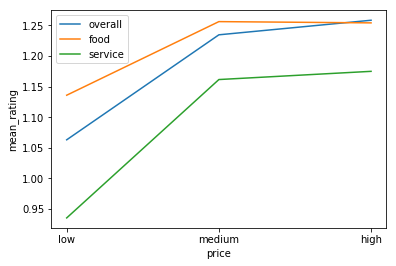

In [172]:
feature_groupby(res_total_feature_analyse,'price',['low', 'medium', 'high'],np.arange(1,4))

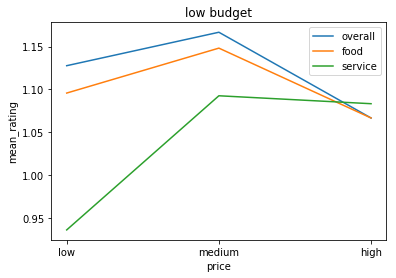

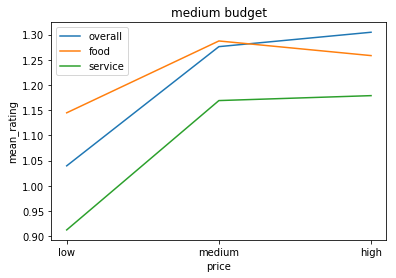

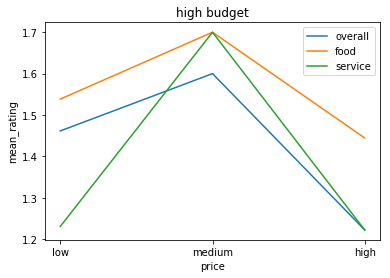

In [170]:
feature_user_groupby(res_total_user_feature,'price','budget', ['low','medium','high'],['low', 'medium', 'high'],np.arange(1,4))

Parking Lot

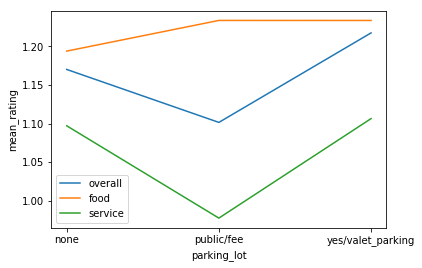

In [173]:
feature_groupby(res_total_feature_analyse,'parking_lot',['none', 'public/fee', 'yes/valet_parking'],np.arange(0,3))

In [175]:
res_total_user_feature['transport'].value_counts()

no car       794
car owner    313
?             54
Name: transport, dtype: int64

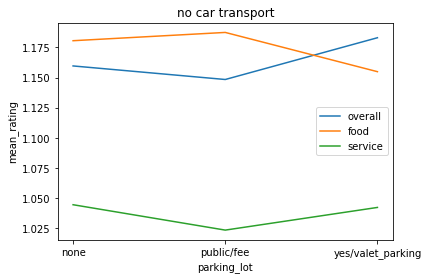

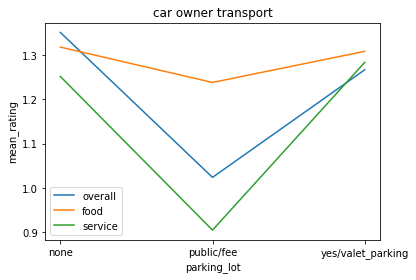

In [176]:
feature_user_groupby(res_total_user_feature,'parking_lot','transport', ['no car','car owner'],['none', 'public/fee', 'yes/valet_parking'],np.arange(0,3))

Smoking area

In [177]:
res_total_feature_analyse['smoking_area'].value_counts()

0    95
1    35
Name: smoking_area, dtype: int64

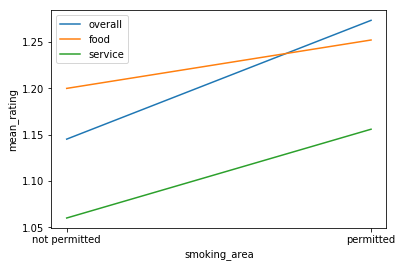

In [178]:
feature_groupby(res_total_feature_analyse,'smoking_area',['not permitted', 'permitted'],np.arange(0,2))

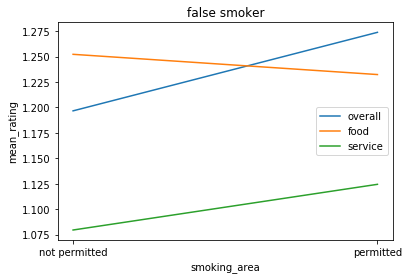

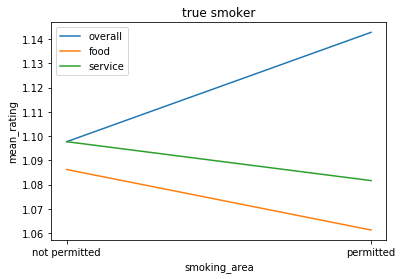

In [179]:
feature_user_groupby(res_total_user_feature,'smoking_area','smoker', ['false','true'],['not permitted', 'permitted'],np.arange(0,2))

Alcohol

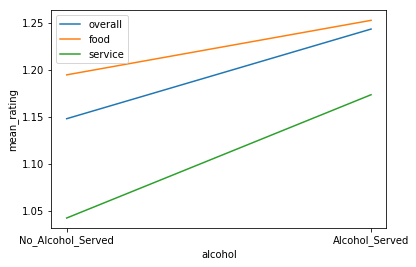

In [180]:
feature_groupby(res_total_feature_analyse,'alcohol',['No_Alcohol_Served', 'Alcohol_Served'],np.arange(0,2))

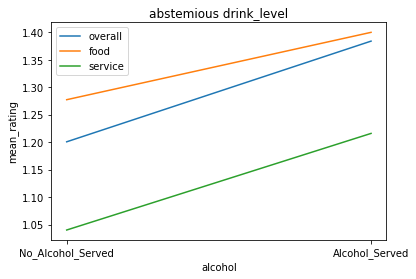

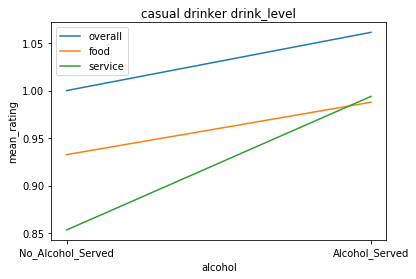

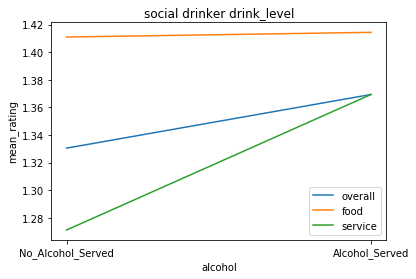

In [181]:
feature_user_groupby(res_total_user_feature,'alcohol','drink_level', ['abstemious','casual drinker','social drinker'],['No_Alcohol_Served', 'Alcohol_Served'],np.arange(0,2))

Other Services

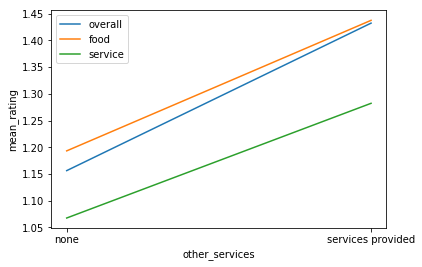

In [182]:
feature_groupby(res_total_feature_analyse,'other_services',['none', 'services provided'],np.arange(0,2))

Dress Code

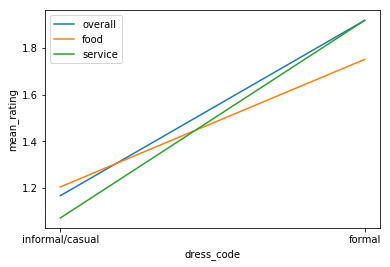

In [183]:
feature_groupby(res_total_feature_analyse,'dress_code',['informal/casual', 'formal'],np.arange(0,2))

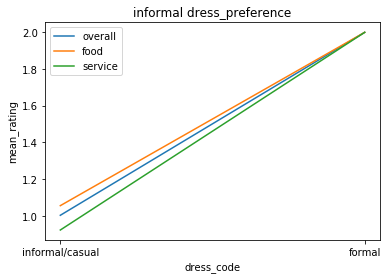

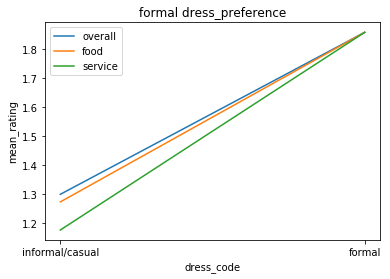

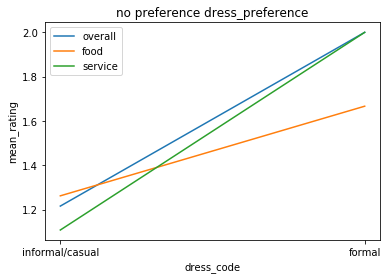

In [184]:
feature_user_groupby(res_total_user_feature,'dress_code','dress_preference', ['informal','formal','no preference'],['informal/casual', 'formal'],np.arange(0,2))

Accessibility

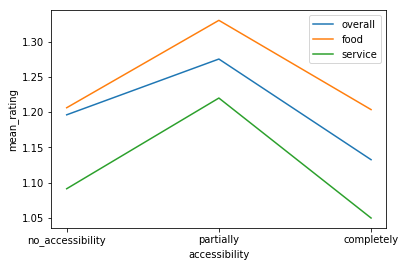

In [185]:
feature_groupby(res_total_feature_analyse,'accessibility',['no_accessibility', 'partially', 'completely'],np.arange(0,3))

Area

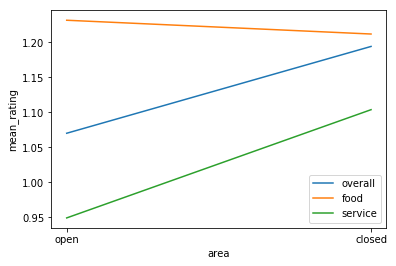

In [186]:
feature_groupby(res_total_feature_analyse,'area',['open', 'closed'],np.arange(0,2))

cuisine

In [187]:
res_total_feature_analyse.head()

,placeID,Rpayment,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,Rcuisine_Breakfast-Brunch,Rcuisine_Burgers,Rcuisine_Cafe-Coffee_Shop,...,accessibility,price,url,Rambience,franchise,area,other_services,overall_rating,food_rating,service_rating
0,135109,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,0,1,1,1,1,1.000000,1.250000,0.750000
1,135106,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,0,0,1,0,0,1.200000,1.200000,1.200000
2,135104,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,0,0,0,1,1,0.857143,1.428571,0.857143
3,135088,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,1,0,1.000000,1.166667,1.000000
4,135086,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,2,0,0,0,1,0,0.800000,0.600000,0.800000


In [189]:
res_total_feature_analyse.iloc[:,2:23].sum()

Rcuisine_American             5.0
Rcuisine_Armenian             1.0
Rcuisine_Bakery               1.0
Rcuisine_Bar                 13.0
Rcuisine_Bar_Pub_Brewery      6.0
Rcuisine_Breakfast-Brunch     1.0
Rcuisine_Burgers              5.0
Rcuisine_Cafe-Coffee_Shop     1.0
Rcuisine_Cafeteria            9.0
Rcuisine_Chinese              3.0
Rcuisine_Contemporary         2.0
Rcuisine_Family               2.0
Rcuisine_Fast_Food            8.0
Rcuisine_Game                 1.0
Rcuisine_International        4.0
Rcuisine_Italian              4.0
Rcuisine_Japanese             5.0
Rcuisine_Mediterranean        1.0
Rcuisine_Mexican             28.0
Rcuisine_Pizzeria             5.0
Rcuisine_Regional             1.0
dtype: float64

In [190]:
res_total_feature_analyse['Rcuisine_Bar_Pub'] = np.zeros(res_total_feature_analyse.shape[0])
inderes_total_feature_analyse = ((res_total_feature_analyse.Rcuisine_Bar == 1) | (res_total_feature_analyse.Rcuisine_Bar_Pub_Brewery == 1))
res_total_feature_analyse.loc[inderes_total_feature_analyse,'Rcuisine_Bar_Pub'] = 1

res_total_feature_analyse['Rcuisine_Asian'] = np.zeros(res_total_feature_analyse.shape[0])
inderes_total_feature_analyse = ((res_total_feature_analyse.Rcuisine_Chinese == 1) | (res_total_feature_analyse.Rcuisine_Japanese == 1) | (res_total_feature_analyse.Rcuisine_Vietnamese == 1))
res_total_feature_analyse.loc[inderes_total_feature_analyse,'Rcuisine_Asian'] = 1

res_total_feature_analyse['Rcuisine_Western'] = np.zeros(res_total_feature_analyse.shape[0])
inderes_total_feature_analyse = ((res_total_feature_analyse.Rcuisine_Armenian == 1) | (res_total_feature_analyse.Rcuisine_Italian == 1) | (res_total_feature_analyse.Rcuisine_Mediterranean == 1) 
         | (res_total_feature_analyse.Rcuisine_Pizzeria == 1) | (res_total_feature_analyse.Rcuisine_Seafood == 1))
res_total_feature_analyse.loc[inderes_total_feature_analyse,'Rcuisine_Western'] = 1

res_total_feature_analyse['Rcuisine_American_Burgers'] = np.zeros(res_total_feature_analyse.shape[0])
inderes_total_feature_analyse = ((res_total_feature_analyse.Rcuisine_American == 1) | (res_total_feature_analyse.Rcuisine_Burgers == 1))
res_total_feature_analyse.loc[inderes_total_feature_analyse,'Rcuisine_American_Burgers'] = 1

res_total_feature_analyse['Rcuisine_Others'] = np.zeros(res_total_feature_analyse.shape[0])
inderes_total_feature_analyse = (((res_total_feature_analyse.Rcuisine_Bakery == 1) | (res_total_feature_analyse["Rcuisine_Breakfast-Brunch"] == 1) | (res_total_feature_analyse["Rcuisine_Cafe-Coffee_Shop"] == 1) 
        | (res_total_feature_analyse.Rcuisine_Contemporary == 1) | (res_total_feature_analyse.Rcuisine_Family == 1) | (res_total_feature_analyse.Rcuisine_Game == 1) 
        | (res_total_feature_analyse.Rcuisine_International == 1) | (res_total_feature_analyse.Rcuisine_Regional == 1)))
res_total_feature_analyse.loc[inderes_total_feature_analyse,'Rcuisine_Others'] = 1

In [191]:
res_total_feature_analyse.head()

,placeID,Rpayment,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,Rcuisine_Breakfast-Brunch,Rcuisine_Burgers,Rcuisine_Cafe-Coffee_Shop,...,area,other_services,overall_rating,food_rating,service_rating,Rcuisine_Bar_Pub,Rcuisine_Asian,Rcuisine_Western,Rcuisine_American_Burgers,Rcuisine_Others
0,135109,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1.000000,1.250000,0.750000,0.0,0.0,1.0,0.0,0.0
1,135106,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.200000,1.200000,1.200000,0.0,0.0,0.0,0.0,0.0
2,135104,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0.857143,1.428571,0.857143,0.0,0.0,0.0,0.0,0.0
3,135088,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1.000000,1.166667,1.000000,0.0,0.0,0.0,0.0,0.0
4,135086,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0.800000,0.600000,0.800000,0.0,0.0,0.0,1.0,0.0


In [199]:
columns = ['Rcuisine_Mexican','Rcuisine_American_Burgers', 'Rcuisine_Asian','Rcuisine_Bar_Pub', 'Rcuisine_Cafeteria',
           'Rcuisine_Fast_Food','Rcuisine_Others','Rcuisine_Western']
overall_rating_cusine = []
food_rating_cusine = []
service_rating_cusine = []

for x in columns:
    overall_mean_value = res_total_feature_analyse['overall_rating'][res_total_feature_analyse[x]==1].mean()
    overall_rating_cusine.append(overall_mean_value)
    food_mean_value = res_total_feature_analyse['food_rating'][res_total_feature_analyse[x]==1].mean()
    food_rating_cusine.append(food_mean_value)
    service_mean_value = res_total_feature_analyse['service_rating'][res_total_feature_analyse[x]==1].mean()
    service_rating_cusine.append(service_mean_value)

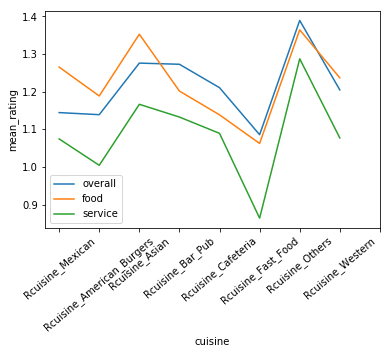

In [206]:
plt.plot(overall_rating_cusine, label='overall')
plt.plot(food_rating_cusine, label='food')
plt.plot(service_rating_cusine, label = 'service')
plt.xticks(np.arange(0,9),columns)
plt.xticks(rotation=40)
plt.legend()
plt.xlabel('cuisine')
plt.ylabel('mean_rating')
plt.show()

In [214]:
res_total_user_feature.columns

Index(['placeID', 'Rpayment', 'Rcuisine_American', 'Rcuisine_Armenian',
       'Rcuisine_Bakery', 'Rcuisine_Bar', 'Rcuisine_Bar_Pub_Brewery',
       'Rcuisine_Breakfast-Brunch', 'Rcuisine_Burgers',
       'Rcuisine_Cafe-Coffee_Shop', 'Rcuisine_Cafeteria', 'Rcuisine_Chinese',
       'Rcuisine_Contemporary', 'Rcuisine_Family', 'Rcuisine_Fast_Food',
       'Rcuisine_Game', 'Rcuisine_International', 'Rcuisine_Italian',
       'Rcuisine_Japanese', 'Rcuisine_Mediterranean', 'Rcuisine_Mexican',
       'Rcuisine_Pizzeria', 'Rcuisine_Regional', 'Rcuisine_Seafood',
       'Rcuisine_Vietnamese', 'parking_lot', 'latitude_x', 'longitude_x',
       'alcohol', 'smoking_area', 'dress_code', 'accessibility', 'price',
       'url', 'Rambience', 'franchise', 'area', 'other_services', 'userID',
       'rating', 'food_rating', 'service_rating', 'latitude_y', 'longitude_y',
       'smoker', 'drink_level', 'dress_preference', 'ambience', 'transport',
       'marital_status', 'hijos', 'birth_year', 'interest'

In [215]:
res_total_user_feature['Rcuisine_Bar_Pub'] = np.zeros(res_total_user_feature.shape[0])
inderes_total_user_feature = ((res_total_user_feature.Rcuisine_Bar == 1) | (res_total_user_feature.Rcuisine_Bar_Pub_Brewery == 1))
res_total_user_feature.loc[inderes_total_user_feature,'Rcuisine_Bar_Pub'] = 1

res_total_user_feature['Rcuisine_Asian'] = np.zeros(res_total_user_feature.shape[0])
inderes_total_user_feature = ((res_total_user_feature.Rcuisine_Chinese == 1) | (res_total_user_feature.Rcuisine_Japanese == 1) | (res_total_user_feature.Rcuisine_Vietnamese == 1))
res_total_user_feature.loc[inderes_total_user_feature,'Rcuisine_Asian'] = 1

res_total_user_feature['Rcuisine_Western'] = np.zeros(res_total_user_feature.shape[0])
inderes_total_user_feature = ((res_total_user_feature.Rcuisine_Armenian == 1) | (res_total_user_feature.Rcuisine_Italian == 1) | (res_total_user_feature.Rcuisine_Mediterranean == 1) 
         | (res_total_user_feature.Rcuisine_Pizzeria == 1) | (res_total_user_feature.Rcuisine_Seafood == 1))
res_total_user_feature.loc[inderes_total_user_feature,'Rcuisine_Western'] = 1

res_total_user_feature['Rcuisine_American_Burgers'] = np.zeros(res_total_user_feature.shape[0])
inderes_total_user_feature = ((res_total_user_feature.Rcuisine_American == 1) | (res_total_user_feature.Rcuisine_Burgers == 1))
res_total_user_feature.loc[inderes_total_user_feature,'Rcuisine_American_Burgers'] = 1

res_total_user_feature['Rcuisine_Others'] = np.zeros(res_total_user_feature.shape[0])
inderes_total_user_feature = (((res_total_user_feature.Rcuisine_Bakery == 1) | (res_total_user_feature["Rcuisine_Breakfast-Brunch"] == 1) | (res_total_user_feature["Rcuisine_Cafe-Coffee_Shop"] == 1) 
        | (res_total_user_feature.Rcuisine_Contemporary == 1) | (res_total_user_feature.Rcuisine_Family == 1) | (res_total_user_feature.Rcuisine_Game == 1) 
        | (res_total_user_feature.Rcuisine_International == 1) | (res_total_user_feature.Rcuisine_Regional == 1)))
res_total_user_feature.loc[inderes_total_user_feature,'Rcuisine_Others'] = 1

In [216]:
res_total_user_feature.columns

Index(['placeID', 'Rpayment', 'Rcuisine_American', 'Rcuisine_Armenian',
       'Rcuisine_Bakery', 'Rcuisine_Bar', 'Rcuisine_Bar_Pub_Brewery',
       'Rcuisine_Breakfast-Brunch', 'Rcuisine_Burgers',
       'Rcuisine_Cafe-Coffee_Shop', 'Rcuisine_Cafeteria', 'Rcuisine_Chinese',
       'Rcuisine_Contemporary', 'Rcuisine_Family', 'Rcuisine_Fast_Food',
       'Rcuisine_Game', 'Rcuisine_International', 'Rcuisine_Italian',
       'Rcuisine_Japanese', 'Rcuisine_Mediterranean', 'Rcuisine_Mexican',
       'Rcuisine_Pizzeria', 'Rcuisine_Regional', 'Rcuisine_Seafood',
       'Rcuisine_Vietnamese', 'parking_lot', 'latitude_x', 'longitude_x',
       'alcohol', 'smoking_area', 'dress_code', 'accessibility', 'price',
       'url', 'Rambience', 'franchise', 'area', 'other_services', 'userID',
       'rating', 'food_rating', 'service_rating', 'latitude_y', 'longitude_y',
       'smoker', 'drink_level', 'dress_preference', 'ambience', 'transport',
       'marital_status', 'hijos', 'birth_year', 'interest'

In [ ]:
res_total_feature_analyse.iloc[:,2:23].sum()

In [243]:
res_total_user_feature_bkup = res_total_user_feature.copy()

In [244]:
res_total_user_feature_bkup = res_total_user_feature_bkup.drop(res_total_user_feature_bkup.columns[2:23], axis=1)

In [245]:
res_total_user_feature_bkup['Rcuisine_Mexican'] = res_total_user_feature['Rcuisine_Mexican']

In [246]:
res_total_user_feature_bkup['Rcuisine_Cafeteria'] = res_total_user_feature['Rcuisine_Cafeteria']

In [247]:
res_total_user_feature_bkup['Rcuisine_Fast_Food'] = res_total_user_feature['Rcuisine_Fast_Food']

In [248]:
res_total_user_feature_bkup.smoker = res_total_user_feature_bkup.smoker.map({'false': 0, 'true': 1, '?': 0})
res_total_user_feature_bkup.drink_level = res_total_user_feature_bkup.drink_level.map({'abstemious': 1, 'casual drinker': 2, 'social drinker': 3})
res_total_user_feature_bkup.transport = res_total_user_feature_bkup.transport.map({'public':0, 'car owner':1, 'on foot':0, '?':0})
res_total_user_feature_bkup.budget = res_total_user_feature_bkup.budget.map({'medium':2, 'low':1, 'high':3, '?':2})

In [249]:
res_total_user_feature_bkup.head()

,placeID,Rpayment,Rcuisine_Seafood,Rcuisine_Vietnamese,parking_lot,latitude_x,longitude_x,alcohol,smoking_area,dress_code,...,Rcuisine,Upayment,Rcuisine_Bar_Pub,Rcuisine_Asian,Rcuisine_Western,Rcuisine_American_Burgers,Rcuisine_Others,Rcuisine_Mexican,Rcuisine_Cafeteria,Rcuisine_Fast_Food
0,135109,2,0.0,0.0,0,18.921785,-99.235350,1,0,0,...,[Mexican],[cash],0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,135109,2,0.0,0.0,0,18.921785,-99.235350,1,0,0,...,[Mexican],"[cash, bank_debit_cards]",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,135109,2,0.0,0.0,0,18.921785,-99.235350,1,0,0,...,[Mexican],"[VISA, cash]",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,135109,2,0.0,0.0,0,18.921785,-99.235350,1,0,0,...,[Contemporary],"[bank_debit_cards, cash, American_Express, VISA]",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,135106,2,0.0,0.0,0,22.149709,-100.976093,1,1,0,...,[Breakfast-Brunch],[cash],0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [250]:
res_total_user_feature_bkup = res_total_user_feature_bkup.drop(['Rcuisine_Seafood','Rcuisine_Vietnamese', 'Rcuisine','Upayment','latitude_x','latitude_y', 'longitude_x','longitude_y', 'color', 'weight','marital_status', 'hijos',
       'birth_year', 'interest', 'personality', 'religion', 'activity',
       'height'], axis=1)

In [251]:
res_total_user_feature_bkup.columns

Index(['placeID', 'Rpayment', 'parking_lot', 'alcohol', 'smoking_area',
       'dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise',
       'area', 'other_services', 'userID', 'rating', 'food_rating',
       'service_rating', 'smoker', 'drink_level', 'dress_preference',
       'ambience', 'transport', 'budget', 'Rcuisine_Bar_Pub', 'Rcuisine_Asian',
       'Rcuisine_Western', 'Rcuisine_American_Burgers', 'Rcuisine_Others',
       'Rcuisine_Mexican', 'Rcuisine_Cafeteria', 'Rcuisine_Fast_Food'],
      dtype='object')

In [252]:
res_total_user_feature_bkup = res_total_user_feature_bkup.drop(['ambience'], axis=1)

In [253]:
res_total_user_feature_bkup.columns

Index(['placeID', 'Rpayment', 'parking_lot', 'alcohol', 'smoking_area',
       'dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise',
       'area', 'other_services', 'userID', 'rating', 'food_rating',
       'service_rating', 'smoker', 'drink_level', 'dress_preference',
       'transport', 'budget', 'Rcuisine_Bar_Pub', 'Rcuisine_Asian',
       'Rcuisine_Western', 'Rcuisine_American_Burgers', 'Rcuisine_Others',
       'Rcuisine_Mexican', 'Rcuisine_Cafeteria', 'Rcuisine_Fast_Food'],
      dtype='object')

In [254]:
res_total_user_feature_bkup['dress_preference'] = res_total_user_feature_bkup['dress_preference'].map({'informal':0, 'no preference':0, '?':0, 'formal': 1})

In [256]:
res_total_user_feature_bkup.isnull().sum()

placeID                      0
Rpayment                     0
parking_lot                  0
alcohol                      0
smoking_area                 0
dress_code                   0
accessibility                0
price                        0
url                          0
Rambience                    0
franchise                    0
area                         0
other_services               0
userID                       0
rating                       0
food_rating                  0
service_rating               0
smoker                       0
drink_level                  0
dress_preference             0
transport                    0
budget                       0
Rcuisine_Bar_Pub             0
Rcuisine_Asian               0
Rcuisine_Western             0
Rcuisine_American_Burgers    0
Rcuisine_Others              0
Rcuisine_Mexican             0
Rcuisine_Cafeteria           0
Rcuisine_Fast_Food           0
dtype: int64

In [255]:
res_total_user_feature_bkup.transport = res_total_user_feature_bkup.transport.fillna(0)

In [257]:
res_total_user_feature_bkup = res_total_user_feature_bkup.drop(['placeID','userID','food_rating',
       'service_rating'], axis=1)

In [258]:
res_total_user_feature_bkup.to_csv('rbkup_1054.csv')

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Use only one feature
res_total_user_feature_bkup_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [261]:
split = np.random.rand(len(res_total_user_feature_bkup)) < 0.81
train_df = res_total_user_feature_bkup[split]
test_df = res_total_user_feature_bkup[~split]

X_train = train_df.loc[:, train_df.columns != 'rating']
y_train = train_df["rating"]
X_test = test_df.loc[:, test_df.columns != 'rating']
y_test = test_df["rating"]

In [262]:
len(X_train)

935

Coefficients: 
 [ 3.33175914e-02 -2.77672956e-02 -7.20042177e-02  8.90168038e-02
  5.25743762e-01 -4.87384423e-04  6.42422809e-02  9.33637501e-02
  3.38807702e-03  2.30471202e-02  1.35226303e-01  2.66602062e-01
 -1.43734902e-01  4.74283290e-02  1.67259931e-01  1.18890085e-01
  7.73728480e-02  3.19340662e-02  2.88215802e-02 -4.75235219e-02
  3.44520834e-02  2.64448573e-01  7.76861647e-02 -1.56474046e-01
  3.03641994e-02]
Mean squared error: 0.60
Variance score: 0.05


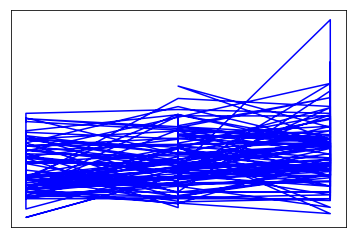

In [274]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
from sklearn.metrics import roc_auc_score, auc, roc_curve
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
rating_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, rating_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, rating_pred))

# Plot outputs
# plt.scatter(X_test, y_test,  color='black')
plt.plot(y_test, rating_pred, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

# logisticRegr = linear_model.LinearRegression()
# logisticRegr.fit(X_train,y_train)
# logit_score = logisticRegr.predict_proba(X_test)



# def plotAUC(truth, pred, lab):
#     fpr, tpr, thresholds = roc_curve(truth, pred)
#     roc_auc = auc(fpr, tpr)
#     c = (np.random.rand(), np.random.rand(), np.random.rand())
#     plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.0])
#     plt.xlabel('FPR')
#     plt.ylabel('TPR')
#     plt.title('ROC')
#     plt.legend(loc="lower right")

# plotAUC(y_test, logit_score, 'LR')  
# plt.show()

In [278]:
from math import sqrt
rms = sqrt(mean_squared_error(y_test, rating_pred))
print(rms)
rms_train = sqrt(mean_squared_error(y_train, regr.predict(X_train)))
print(rms_train)

0.7738798366074824
0.7457038305235493


In [273]:
rating_pred

array([1.11885066, 0.99404949, 1.47242473, 1.3051648 , 1.51985306,
       1.3051648 , 1.0081338 , 1.09867184, 1.14610017, 1.06872732,
       1.18761741, 1.28851529, 1.37715076, 1.03766133, 1.08508965,
       1.20492126, 1.11503417, 0.98878308, 1.11243727, 1.08249275,
       1.18244911, 1.40648843, 1.57280685, 1.39534457, 1.27551297,
       1.04914074, 1.09832472, 1.00937916, 1.47780174, 1.30557596,
       1.40188253, 1.12333314, 0.92264573, 1.21470684, 1.13173806,
       1.30447596, 1.13815755, 1.30447596, 1.28854879, 1.19369214,
       1.16857329, 1.21600162, 1.28840489, 0.94746554, 1.21600162,
       1.24003504, 1.3348917 , 1.15175934, 1.19421809, 1.05048319,
       1.22322109, 1.12691452, 1.22322109, 1.32703034, 1.20222916,
       1.32703034, 1.27866049, 1.03496923, 1.06491375, 1.27310926,
       1.09942984, 1.01409933, 1.01409933, 1.01409933, 1.18135926,
       1.24316474, 1.09942984, 1.11463028, 1.44466141, 1.27740148,
       1.32482981, 1.64092434, 1.39723308, 1.27740148, 1.15260